## *I2A2-ABDI - Turma 2 - Desafio 4*
### *Aluno:João Paulo da Silva Cardoso*

##**Enunciado do desafio**

A base de dados a seguir, contém todos as informações disponibilizadas sobre os sorteios da Loto fácil, desde o primeiro sorteio. De todas as loterias da Caixa Econômica esta é a que tem a maior probabilidade de premiação (basta olharem a coluna de ganhadores com 11 números). As regras de funcionamento atual desta loteria, vocês encontrarão no site da Caixa Econômica Federal. Observe que as regras mudaram ligeiramente ao longo do tempo e isto está refletido nos dados. Adicionalmente, na planilha vocês encontrarão uma coluna chamada Id que é um identificador binário do sorteio realizado e os números sorteados em ordem crescente e ordem de sorteio. A coluna da Cidade contém os municípios ou os estados onde houveram ganhadores com 15 números. Eventualmente, não há ganhadores com 15 números, então o valor é acumulado para o próximo sorteio. Isto pode ser notado quando na coluna Ganhadores 15 Números há valor 0. Se vocês pesquisarem na internet, encontrarão diversas combinações mágicas e infalíveis, sequencias tanto dentro do próprio sorteio quanto entre sorteios, e assim por diante. 

**A tarefa é:**

1. Criar um ou mais notebooks utilizando esta base.
2. Efetuar a limpeza dos dados**
3. Efetuar a análise exploratória dos dados
4. Utilizado as dicas "mágicas" encontradas na internet, fazer a engenharia de features para criar novos atributos em sua base (P.ex. quantidade de números pares, números repetidos em relação ao sorteio anterior, etc.)
5. Utilizar os algoritmos estudados nesta semana e nas duas semanas seguintes para criar um modelo que faça a previsão dos números sorteados.
6. É muito, muito, muito provável que vocês não terão sucesso na etapa 5. Então, temos algumas perguntas para responder:
  * Porque não tive sucesso.
  * Qual a entropia destes dados?
  * Qual modelo teve o melhor resultado e porquê?** 
   
O Estudo deve seguir a metodologia CRISP-DS, descrevendo as etapas realizadas. Ao final, coloquem também seus comentários. Como sempre, a entrega é obrigatória e vocês tem até o dia 24/04 às 23h59.

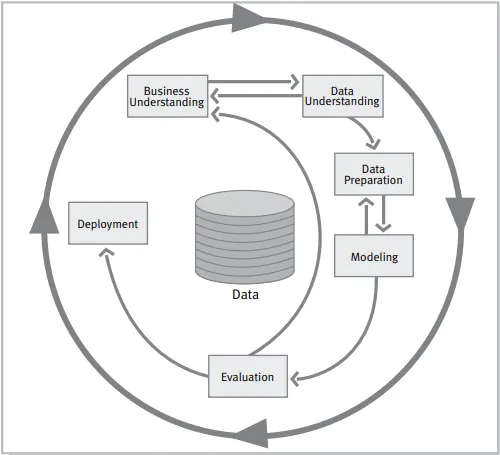

Source: CRISP-DM 1.0 

#**1. Entendimento do Negócio**



###**1.1 Entendimento do Problema**

Buscar compreender um mecanismo que possa prever os resultados futuros dos sorteios, tendo como base os padrões observados na série histórica dos resultados.

###**1.2 Entendimento do Negócio**

A Lotofácil é uma loteria da Caixa Econômica Federal, que consiste em sortear 15 números dentre 25 possíveis. Os jogadores escolhem um conjunto de 15 números e ganham um prêmio se acertarem 11, 12, 13, 14 ou 15 números. O objetivo deste desafio é criar um modelo de aprendizado de máquina que faça a previsão dos números sorteados.


#**2. Entendimento dos dados**

Esta análise foi possível de ser realizada tanto no google colab quanto localmente. A base de dados não comprometeu os recursos oferecidos pela versão gratuita do google colaboratory 

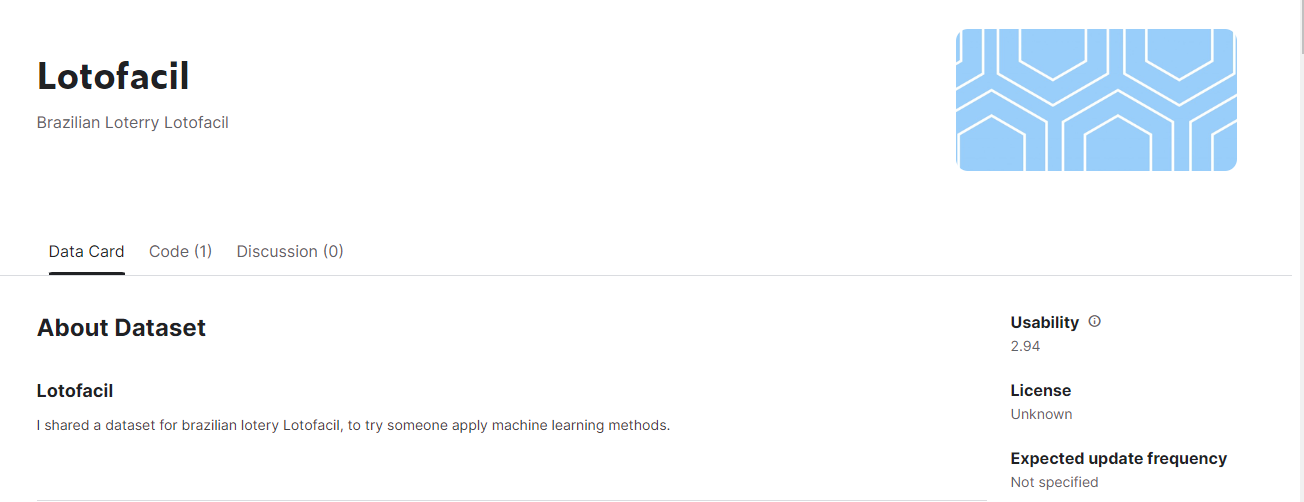

*O dataset utilizado nesta tarefa é uma versão adaptada desta versão ilustrada no kaggle, e encontra-se no link abaixo Disponível em:*
https://github.com/jpscard/I2A2_AI_Industry_Desafios/blob/main/Desafio%204/Sorteios_Completo.xlsx

### 2.1 Importando bibliotecas

In [1]:
import os
from google.colab import drive
from google.colab import auth
from google.colab import files
import IPython
from IPython.display import Image
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno           as msno
import requests 
from bs4 import BeautifulSoup
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings


%matplotlib inline

pd.set_option('display.max_columns',500)
# Configurar estilo seaborn para gráficos
sns.set_style('darkgrid')

### 2.2 Fazendo upload do dataset

In [2]:
# Fazer upload do arquivo (opcional)
uploaded = files.upload()

Saving Sorteios_Completo.xlsx to Sorteios_Completo (26).xlsx


### 2.3 Carregando o dataset

In [3]:
# Carrega o arquivo CSV com os dados da Lotofácil
df = pd.read_excel('/content/Sorteios_Completo.xlsx')

In [4]:
df['Data Sorteio'] = pd.to_datetime(df['Data Sorteio'], format='%Y/%m/%d')
print(df['Data Sorteio'].head(1))

0   2003-09-29
Name: Data Sorteio, dtype: datetime64[ns]


In [5]:
# Padronizando o dataset
df.columns = ['Concurso', 'Data Sorteio','Id','bola1','bola2', 'bola3','bola4','bola5','bola6', 'bola7', 'bola8', 'bola9', 'bola10', 'bola11', 'bola12', 'bola13', 'bola14', 'bola15'
              ,'sorteado1', 'sorteado2', 'sorteado3', 'sorteado4', 'sorteado5', 'sorteado6', 'sorteado7', 'sorteado8', 'sorteado9', 'sorteado10', 'sorteado11', 'sorteado12', 'sorteado13', 'sorteado14', 'sorteado15'
              , 'Arrecadação_Total', 'Ganhadores 15 Números', 'Ganhadores 14 Números', 'Ganhadores 13 Números', 'Ganhadores 12 Números', 'Ganhadores 11 Números'
              , 'Valor Rateio 15 Números', 'Valor Rateio 14 Números', 'Valor Rateio 13 Números', 'Valor Rateio 12 Números', 'Valor Rateio 11 Números'
              , 'Acumulado 15 Números', 'Estimativa Prêmio', 'Valor Acumulado Especial', 'Local 15 Números']
df.head()

,Concurso,Data Sorteio,Id,bola1,bola2,bola3,bola4,bola5,bola6,bola7,bola8,bola9,bola10,bola11,bola12,bola13,bola14,bola15,sorteado1,sorteado2,sorteado3,sorteado4,sorteado5,sorteado6,sorteado7,sorteado8,sorteado9,sorteado10,sorteado11,sorteado12,sorteado13,sorteado14,sorteado15,Arrecadação_Total,Ganhadores 15 Números,Ganhadores 14 Números,Ganhadores 13 Números,Ganhadores 12 Números,Ganhadores 11 Números,Valor Rateio 15 Números,Valor Rateio 14 Números,Valor Rateio 13 Números,Valor Rateio 12 Números,Valor Rateio 11 Números,Acumulado 15 Números,Estimativa Prêmio,Valor Acumulado Especial,Local 15 Números
0,1,2003-09-29,30062390,2,3,5,6,9,10,11,13,14,16,18,20,23,24,25,18,20,25,23,10,11,24,14,6,2,13,9,5,16,3,NaN,5,154,4645,48807,257593,49765.82,689.84,10.0,4,2.0,0.0,NaN,NaN,"BA, PR, SP"
1,2,2003-10-06,13426041,1,4,5,6,7,9,11,12,13,15,16,19,20,23,24,23,15,5,4,12,16,20,6,11,19,24,1,9,13,7,NaN,1,184,6232,81252,478188,596323.70,1388.95,10.0,4,2.0,0.0,NaN,NaN,SP
2,3,2003-10-13,13217769,1,4,6,7,8,9,10,11,12,14,16,17,20,23,24,20,23,12,8,6,1,7,11,14,4,16,10,9,17,24,NaN,2,158,6897,96244,608211,400623.70,2173.36,10.0,4,2.0,0.0,NaN,NaN,SP
3,4,2003-10-20,29858459,1,2,4,5,8,10,12,13,16,17,18,19,23,24,25,16,5,25,24,23,8,12,2,17,18,1,10,4,19,13,NaN,1,258,9569,123912,706657,902226.02,1498.72,10.0,4,2.0,0.0,NaN,NaN,MT
4,5,2003-10-27,30203275,1,2,4,8,9,11,12,13,15,16,19,20,23,24,25,15,13,20,2,11,24,9,16,4,23,25,12,8,19,1,NaN,2,472,14736,195636,860992,380017.55,687.49,10.0,4,2.0,0.0,NaN,NaN,"BA, MS"


### 2.4 Análise inicial dos dados

In [6]:
# Exibe as dimensões do dataframe
df.shape

(2780, 48)

In [7]:
# Encontrar o número de instancias em que os dados foram coletados
df.index.max() - df.index.min()

2779

In [8]:
# Exibir um resumo das informações do dataframe, como número de linhas, colunas, tipos de dados, uso de memória, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2780 entries, 0 to 2779
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Concurso                  2780 non-null   int64         
 1   Data Sorteio              2780 non-null   datetime64[ns]
 2   Id                        2780 non-null   int64         
 3   bola1                     2780 non-null   int64         
 4   bola2                     2780 non-null   int64         
 5   bola3                     2780 non-null   int64         
 6   bola4                     2780 non-null   int64         
 7   bola5                     2780 non-null   int64         
 8   bola6                     2780 non-null   int64         
 9   bola7                     2780 non-null   int64         
 10  bola8                     2780 non-null   int64         
 11  bola9                     2780 non-null   int64         
 12  bola10              

In [9]:
# Verificar se há valores NaN (not a number)
missing_count= df.isnull().sum() # Para contabilizar valores nulos
value_count=df.isnull().count()
missing_percentage=round(missing_count/value_count *100, 1) # Para indicar o percentual de valores nulos
missing_df= pd.DataFrame({"Quantidade": missing_count, "Percentual": missing_percentage})
print(missing_df)

                          Quantidade  Percentual
Concurso                           0         0.0
Data Sorteio                       0         0.0
Id                                 0         0.0
bola1                              0         0.0
bola2                              0         0.0
bola3                              0         0.0
bola4                              0         0.0
bola5                              0         0.0
bola6                              0         0.0
bola7                              0         0.0
bola8                              0         0.0
bola9                              0         0.0
bola10                             0         0.0
bola11                             0         0.0
bola12                             0         0.0
bola13                             0         0.0
bola14                             0         0.0
bola15                             0         0.0
sorteado1                          0         0.0
sorteado2           

In [10]:
# Verifica a distribuição dos valores em cada coluna categórica
print('Distribuição dos valores em cada coluna categórica:')
df.describe(include=['O'])

Distribuição dos valores em cada coluna categórica:


,Local 15 Números
count,2501
unique,2079
top,Canal Eletronico/--
freq,38


In [11]:
df.drop(columns=['Data Sorteio','Local 15 Números'], inplace=True)
df.head(1)

,Concurso,Id,bola1,bola2,bola3,bola4,bola5,bola6,bola7,bola8,bola9,bola10,bola11,bola12,bola13,bola14,bola15,sorteado1,sorteado2,sorteado3,sorteado4,sorteado5,sorteado6,sorteado7,sorteado8,sorteado9,sorteado10,sorteado11,sorteado12,sorteado13,sorteado14,sorteado15,Arrecadação_Total,Ganhadores 15 Números,Ganhadores 14 Números,Ganhadores 13 Números,Ganhadores 12 Números,Ganhadores 11 Números,Valor Rateio 15 Números,Valor Rateio 14 Números,Valor Rateio 13 Números,Valor Rateio 12 Números,Valor Rateio 11 Números,Acumulado 15 Números,Estimativa Prêmio,Valor Acumulado Especial
0,1,30062390,2,3,5,6,9,10,11,13,14,16,18,20,23,24,25,18,20,25,23,10,11,24,14,6,2,13,9,5,16,3,NaN,5,154,4645,48807,257593,49765.82,689.84,10.0,4,2.0,0.0,NaN,NaN


#**3. Limpeza dos dados**

In [12]:
df1 = pd.read_excel('/content/Sorteios_Completo.xlsx')

<Axes: >

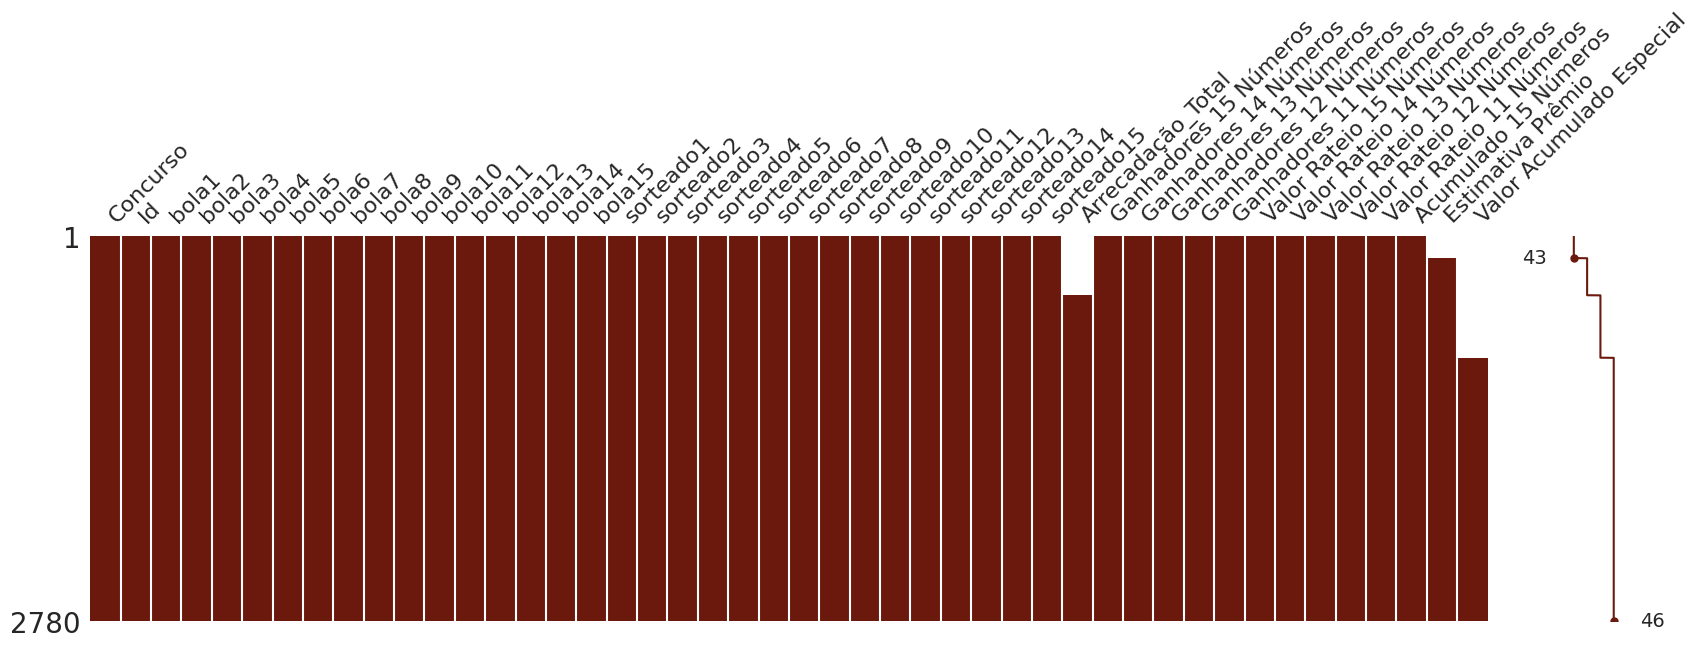

In [13]:
# Removendo valores nulos 
df1= df1.dropna(subset=['Concurso'])
# Removendo colunas
df1 = df1.drop(['Id', 'Local 15 Números'], axis=1)
msno.matrix(df=df.iloc[:,0:df.shape[1]], figsize=(20, 5), color=(0.42, 0.1, 0.05))

#**4. Análise Exploratória dos dados**

### Analisando ganhadores por mês 

In [14]:
df1['data_sorteio_conv'] = df1.iloc[:,1]
df1.data_sorteio_conv = pd.to_datetime(df1.data_sorteio_conv)

df1['day']   = df1.data_sorteio_conv.dt.day
df1['month'] = df1.data_sorteio_conv.dt.month 
df1['year']  = df1.data_sorteio_conv.dt.year

In [15]:
df_ganhadores = df1[:]

df_ganhadores.head()

,Concurso,Data Sorteio,Bola 01,Bola 02,Bola 03,Bola 04,Bola 05,Bola 06,Bola 07,Bola 08,Bola 09,Bola 10,Bola 11,Bola 12,Bola 13,Bola 14,Bola 15,Sorteado 01,Sorteado 02,Sorteado 03,Sorteado 04,Sorteado 05,Sorteado 06,Sorteado 07,Sorteado 08,Sorteado 09,Sorteado 10,Sorteado 11,Sorteado 12,Sorteado 13,Sorteado 14,Sorteado 15,Arrecadação_Total,Ganhadores 15 Números,Ganhadores 14 Números,Ganhadores 13 Números,Ganhadores 12 Números,Ganhadores 11 Números,Valor Rateio 15 Números,Valor Rateio 14 Números,Valor Rateio 13 Números,Valor Rateio 12 Números,Valor Rateio 11 Números,Acumulado 15 Números,Estimativa Prêmio,Valor Acumulado Especial,data_sorteio_conv,day,month,year
0,1,2003-09-29,2,3,5,6,9,10,11,13,14,16,18,20,23,24,25,18,20,25,23,10,11,24,14,6,2,13,9,5,16,3,NaN,5,154,4645,48807,257593,49765.82,689.84,10.0,4,2.0,0.0,NaN,NaN,2003-09-29,29,9,2003
1,2,2003-10-06,1,4,5,6,7,9,11,12,13,15,16,19,20,23,24,23,15,5,4,12,16,20,6,11,19,24,1,9,13,7,NaN,1,184,6232,81252,478188,596323.70,1388.95,10.0,4,2.0,0.0,NaN,NaN,2003-10-06,6,10,2003
2,3,2003-10-13,1,4,6,7,8,9,10,11,12,14,16,17,20,23,24,20,23,12,8,6,1,7,11,14,4,16,10,9,17,24,NaN,2,158,6897,96244,608211,400623.70,2173.36,10.0,4,2.0,0.0,NaN,NaN,2003-10-13,13,10,2003
3,4,2003-10-20,1,2,4,5,8,10,12,13,16,17,18,19,23,24,25,16,5,25,24,23,8,12,2,17,18,1,10,4,19,13,NaN,1,258,9569,123912,706657,902226.02,1498.72,10.0,4,2.0,0.0,NaN,NaN,2003-10-20,20,10,2003
4,5,2003-10-27,1,2,4,8,9,11,12,13,15,16,19,20,23,24,25,15,13,20,2,11,24,9,16,4,23,25,12,8,19,1,NaN,2,472,14736,195636,860992,380017.55,687.49,10.0,4,2.0,0.0,NaN,NaN,2003-10-27,27,10,2003


<Axes: title={'center': 'Ganhadores X Mês'}, xlabel='month'>

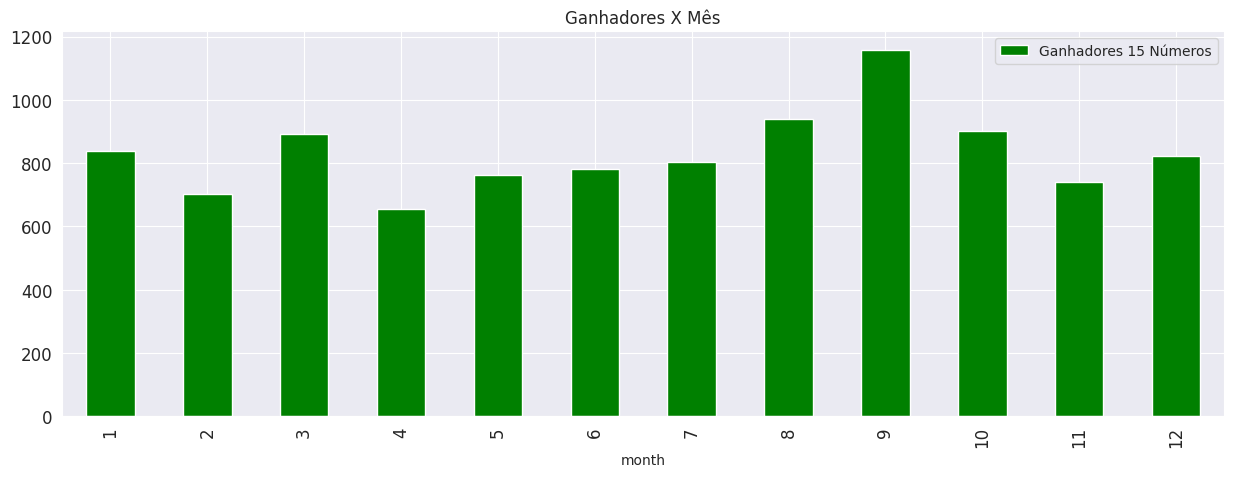

In [16]:
# Ganhadores X Volume do Prêmio por mes 
df1.groupby(['month'])['Ganhadores 15 Números'].agg('sum').plot(kind='bar', title='Ganhadores X Mês', fontsize=12, figsize=(15,5), legend=True, color='green')

### Analisando ganhadores por ano

<Axes: title={'center': 'Ganhadores X Ano'}, xlabel='year'>

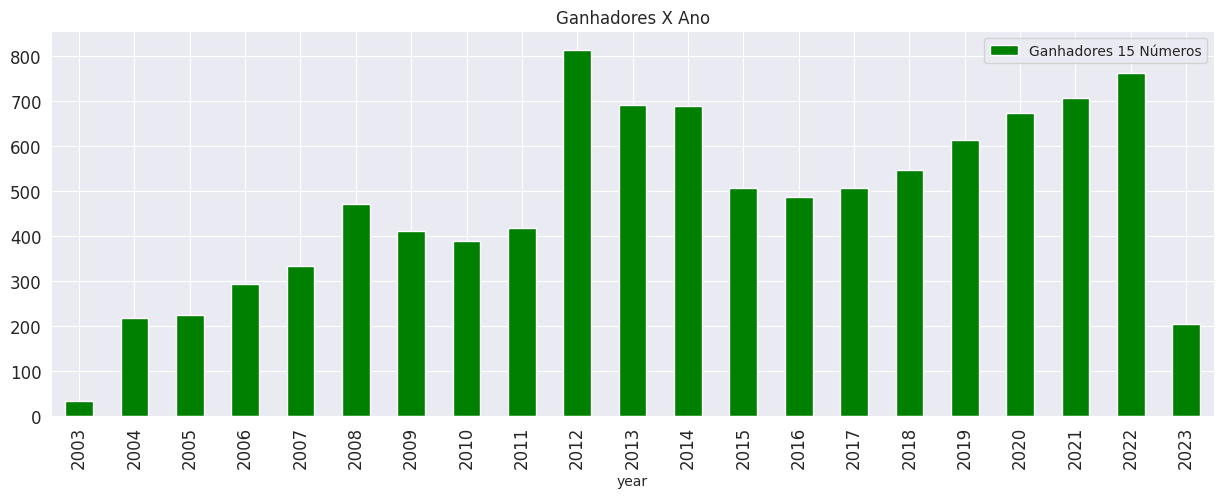

In [17]:
# Ganhadores X Volume do Prêmio por ano 
df_ganhadores.groupby(['year'])['Ganhadores 15 Números'].agg('sum').plot(kind='bar', title='Ganhadores X Ano', fontsize=12, figsize=(15,5), legend=True, color='green')

### Analisando dezenas sorteadas

In [18]:
# Verificando se alguma vez as dezenas se repetiram na mesma ordem
df1.groupby(['Bola 01',	'Bola 02', 'Bola 03',	'Bola 04',	'Bola 05',	'Bola 06',	'Bola 07',	'Bola 08',	'Bola 09',	'Bola 10',	'Bola 11',	'Bola 12',	'Bola 13',	'Bola 14',	'Bola 15']).size().sort_values(ascending=False)

Bola 01  Bola 02  Bola 03  Bola 04  Bola 05  Bola 06  Bola 07  Bola 08  Bola 09  Bola 10  Bola 11  Bola 12  Bola 13  Bola 14  Bola 15
1        2        3        4        5        6        7        8        9        10       13       14       20       23       25         1
2        3        4        6        9        10       12       14       16       17       18       20       22       24       25         1
                                    8        10       12       13       14       17       18       19       20       21       23         1
                                             11       14       15       17       18       19       22       23       24       25         1
                                             12       13       14       15       16       19       21       22       23       24         1
                                                                                                                                        ..
1        2        6        7    

<Axes: title={'center': 'As quinze dezenas mais sorteadas em todos os jogos'}>

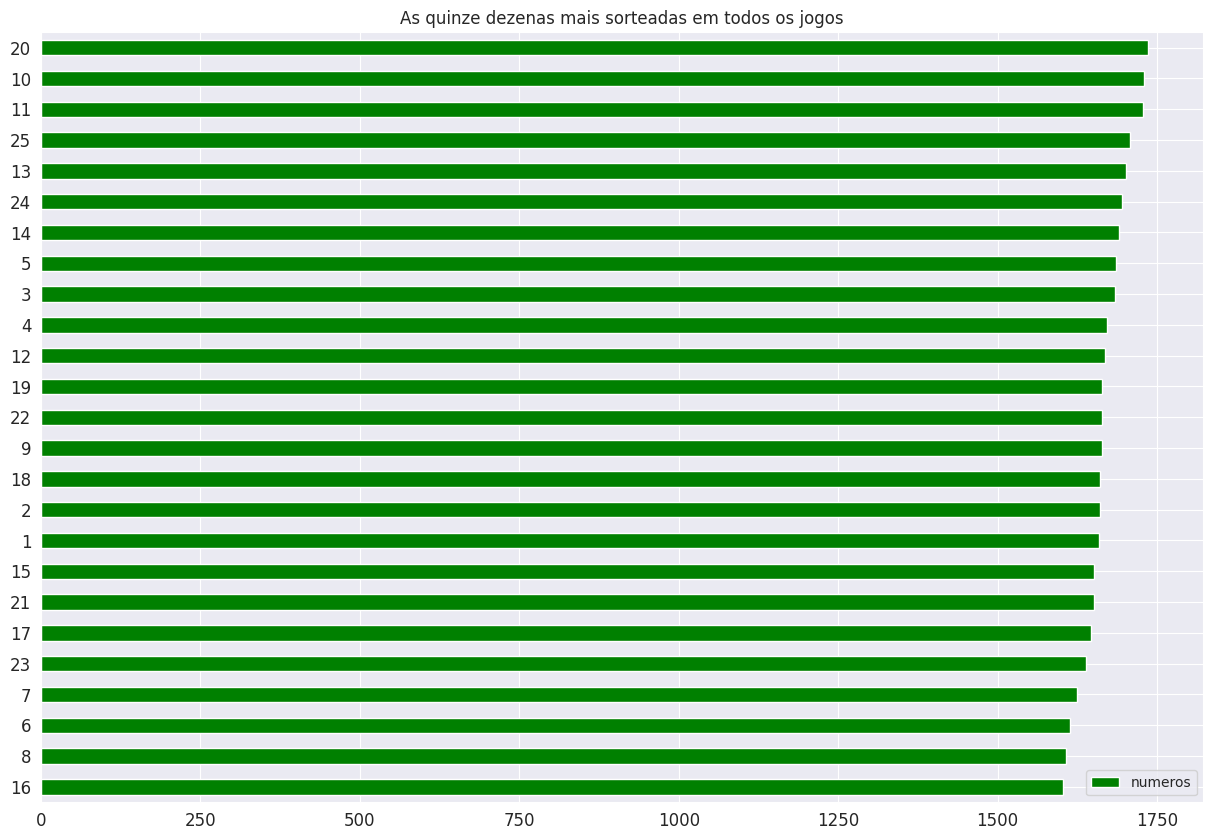

In [19]:
# As dezenas mais sorteadas em todos os jogos

dezenas = pd.DataFrame(df1['Bola 01'].tolist() + df1['Bola 02'].tolist() + df1['Bola 03'].tolist() + df1['Bola 04'].tolist() + df1['Bola 05'].tolist() + df1['Bola 06'].tolist() +df1['Bola 07'].tolist() + df1['Bola 08'].tolist() + df1['Bola 09'].tolist() + df1['Bola 10'].tolist() + df1['Bola 11'].tolist() + df1['Bola 12'].tolist() +
df1['Bola 13'].tolist() + df1['Bola 14'].tolist() + df1['Bola 15'].tolist(), columns=['numeros'])

dezenas['numeros'].value_counts().sort_values(ascending=True).plot(kind='barh', title='As quinze dezenas mais sorteadas em todos os jogos', figsize=(15,10), fontsize=12, legend=True, color='green')

### Divisão dos dados em conjuntos de treinamento, validação e teste.

In [20]:
X = df.drop(columns=['bola15'])
y = df['bola15']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Eliminando Valores ausentes e nulos:

In [21]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

## Engenharia de features:
### Selecionando ou criando novas features que podem ajudar a melhorar o modelo.

In [22]:
X_train['soma_bolas'] = X_train.sum(axis=1)
X_train['media_bolas'] = X_train.mean(axis=1)

X_test['soma_bolas'] = X_test.sum(axis=1)
X_test['media_bolas'] = X_test.mean(axis=1)

## Conjunto de dados final

In [23]:
df_cleaned = pd.concat([X_train, y_train], axis=1)
df_cleaned.to_csv('Sorteios_Limpo.csv', index=False)

### Histograma das bolas sorteadas

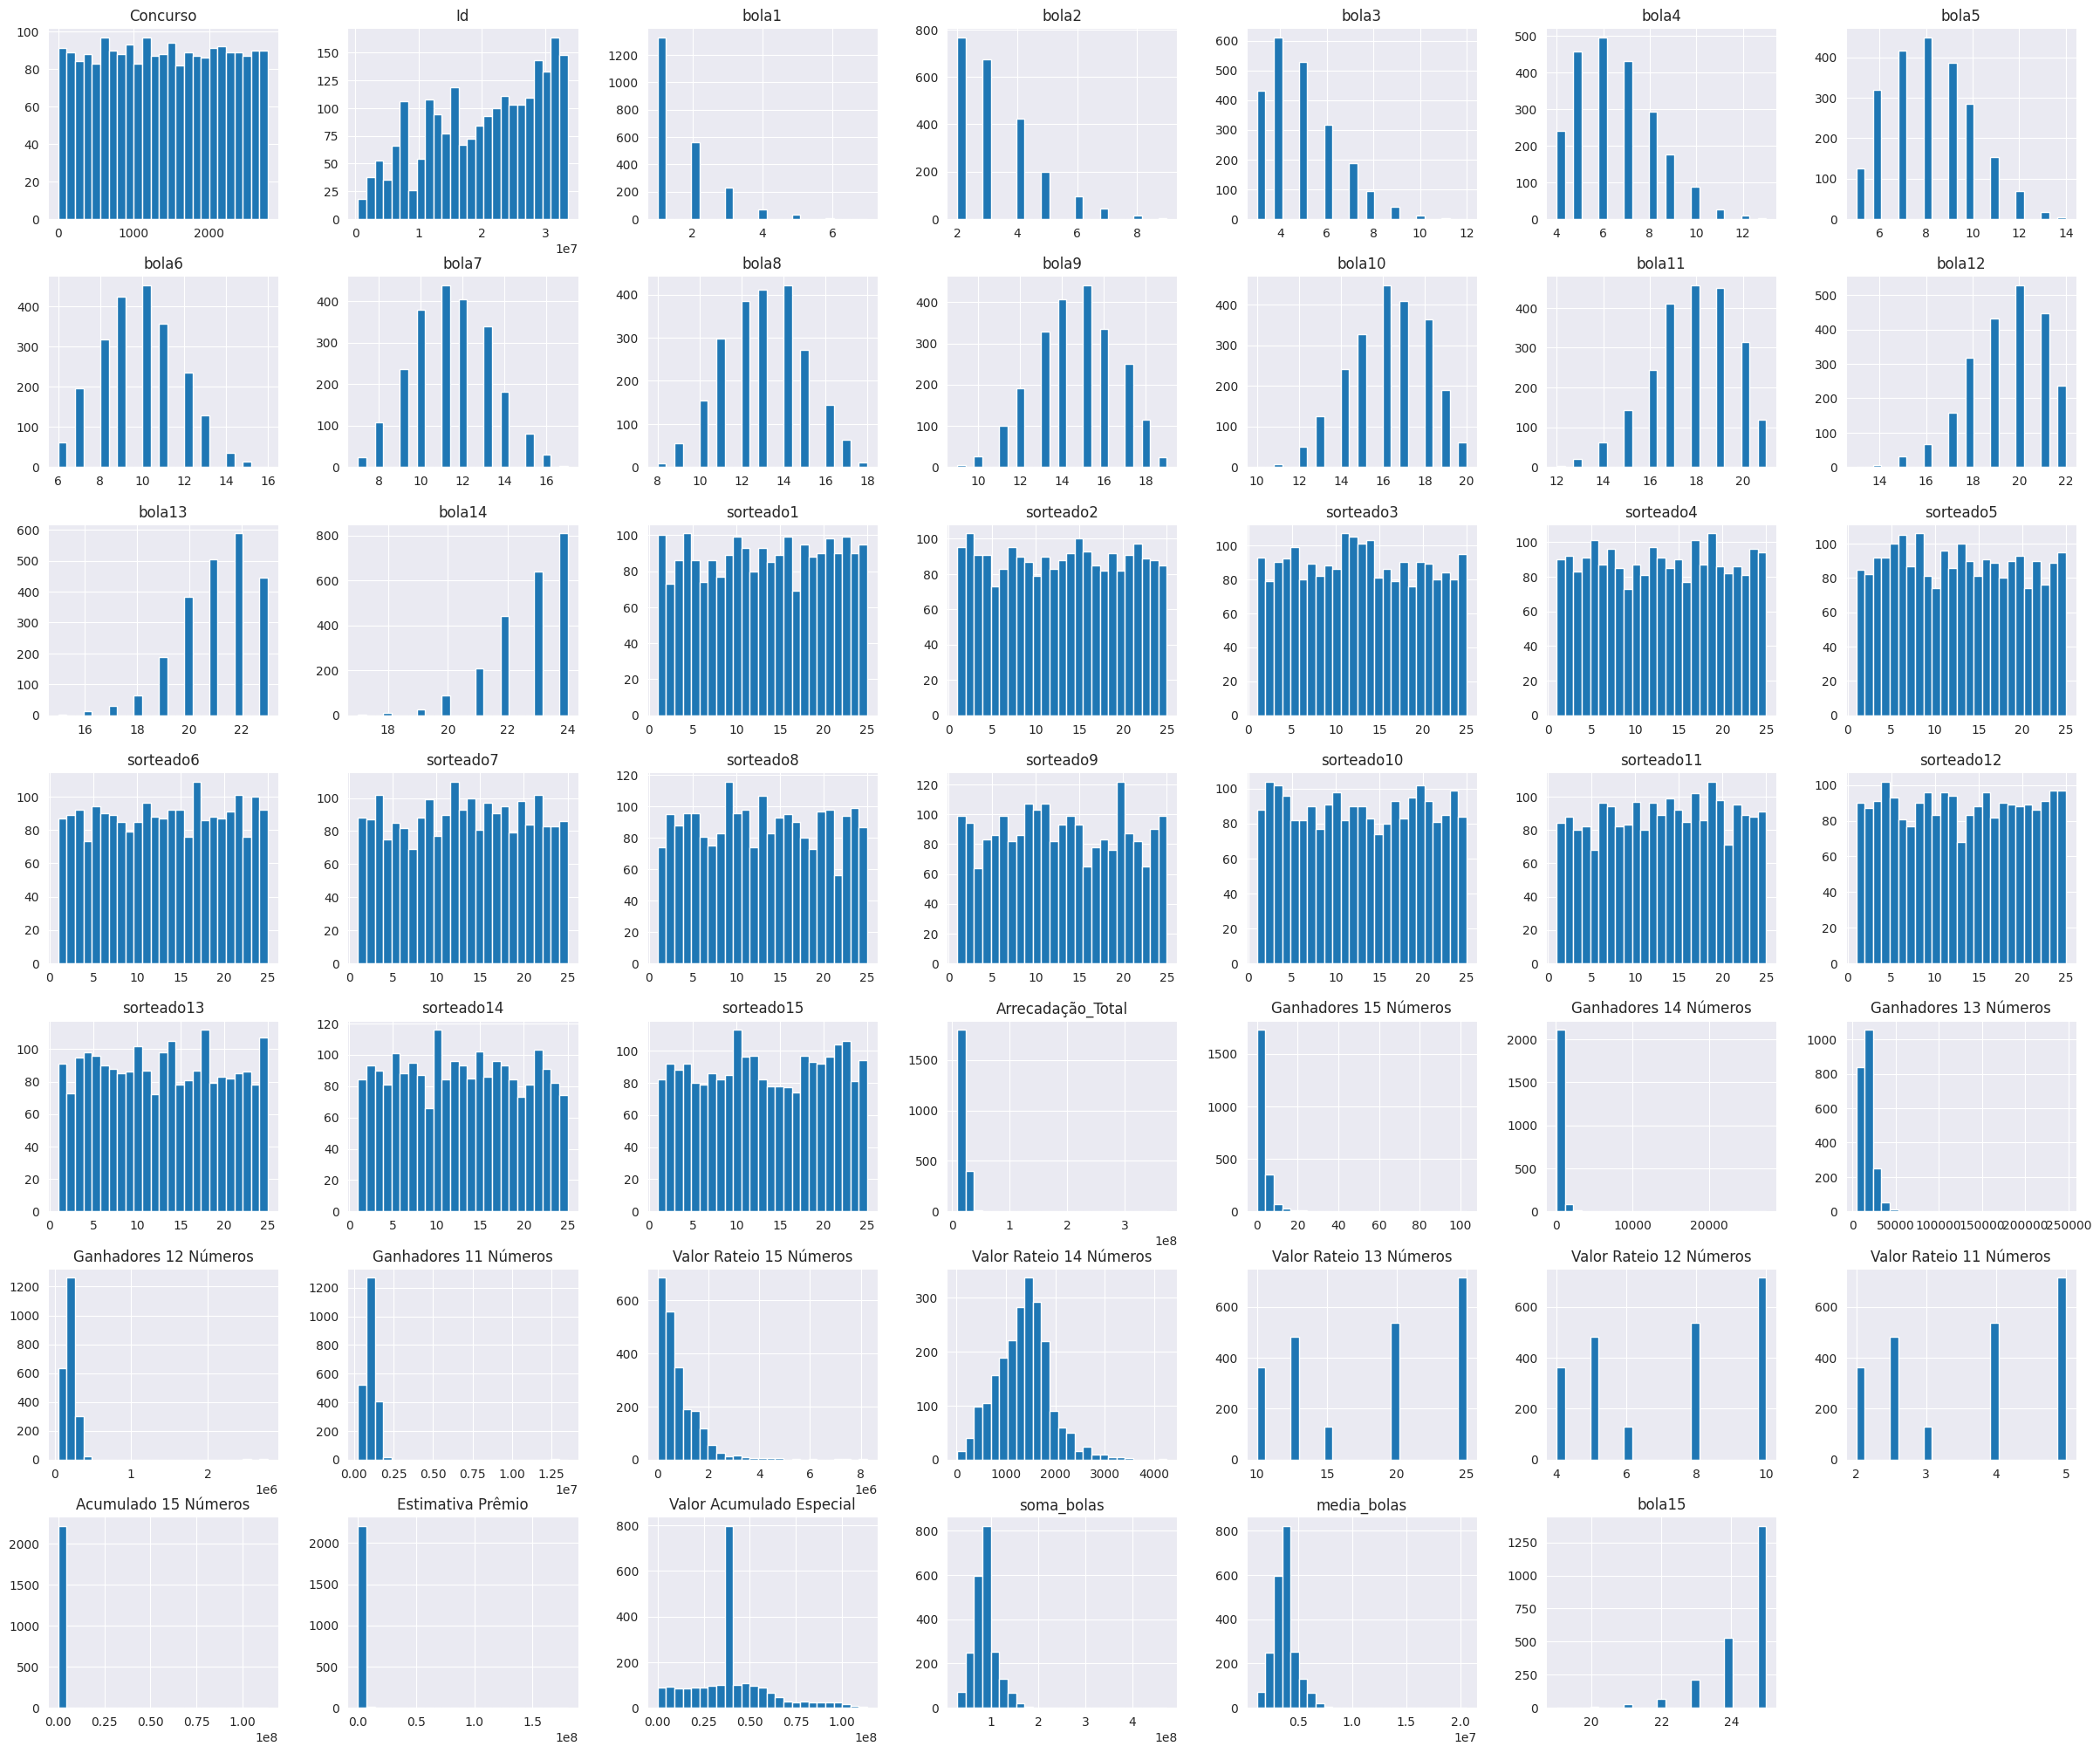

In [24]:
df = pd.read_csv('Sorteios_Limpo.csv')

# Histograma das bolas sorteadas
df.hist(bins=25, figsize=(30,25))
plt.show()

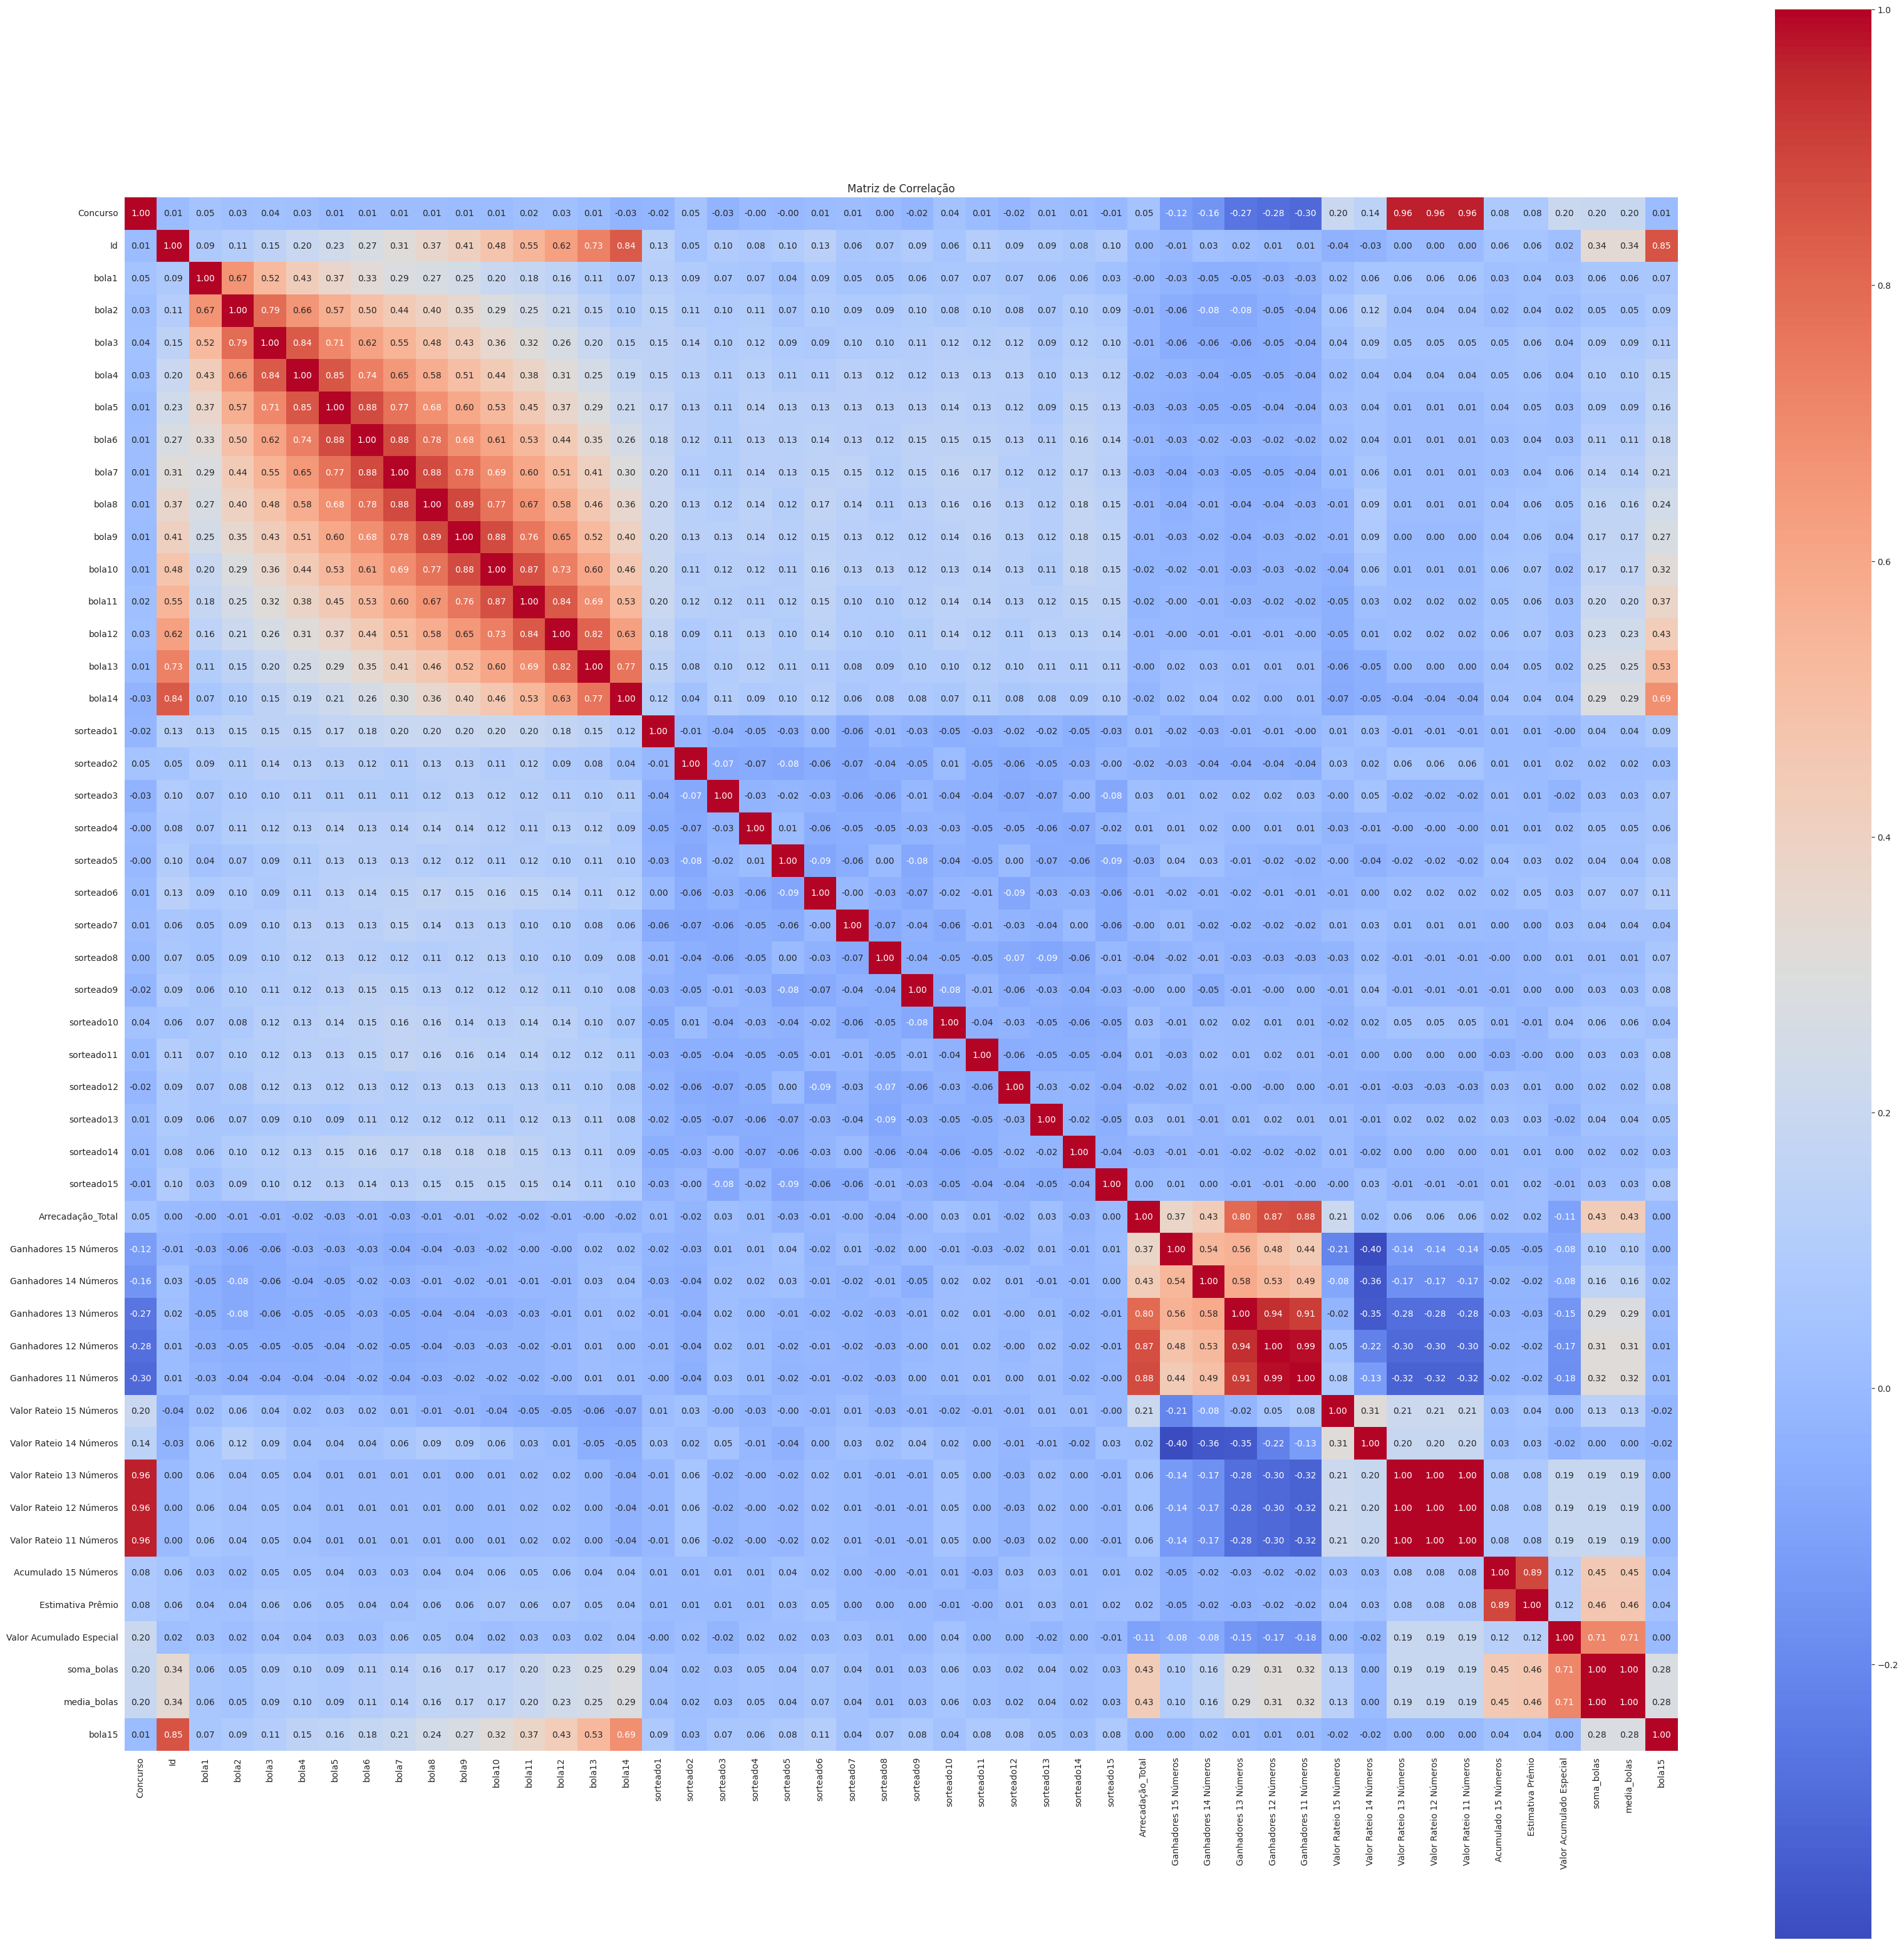

In [25]:
# Matriz de correlação
corr = df.corr()
# Define o tamanho da figura
plt.figure(figsize=(40,40))
# Heatmap da matriz de correlação
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Matriz de Correlação')
plt.show()

In [26]:
# Exibe as variáveis com maiores correlações
print('Variáveis com maiores correlações:')
print(corr.unstack().sort_values(ascending=False)[:10])

Variáveis com maiores correlações:
Concurso    Concurso      1.0
sorteado10  sorteado10    1.0
sorteado8   sorteado8     1.0
sorteado7   sorteado7     1.0
sorteado6   sorteado6     1.0
sorteado5   sorteado5     1.0
sorteado4   sorteado4     1.0
sorteado3   sorteado3     1.0
sorteado2   sorteado2     1.0
sorteado1   sorteado1     1.0
dtype: float64


In [27]:
# Exibe as variáveis com menores correlações
print('\nVariáveis com menores correlações:')
print(corr.unstack().sort_values(ascending=True)[:10])


Variáveis com menores correlações:
Valor Rateio 14 Números  Ganhadores 15 Números     -0.399166
Ganhadores 15 Números    Valor Rateio 14 Números   -0.399166
Ganhadores 14 Números    Valor Rateio 14 Números   -0.364937
Valor Rateio 14 Números  Ganhadores 14 Números     -0.364937
Ganhadores 13 Números    Valor Rateio 14 Números   -0.350819
Valor Rateio 14 Números  Ganhadores 13 Números     -0.350819
Ganhadores 11 Números    Valor Rateio 13 Números   -0.324821
Valor Rateio 13 Números  Ganhadores 11 Números     -0.324821
Ganhadores 11 Números    Valor Rateio 11 Números   -0.324821
                         Valor Rateio 12 Números   -0.324821
dtype: float64


In [28]:
# Exibe as variáveis sem correlação
no_corr = corr.unstack()[corr.unstack() == 0].index
print('\nVariáveis sem correlação:')
print(no_corr)


Variáveis sem correlação:
MultiIndex([], )


# 5. Modelagem:
## Preparação dos dados para aprendizado de máquina:



In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Escalonar os dados
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Eliminar features inúteis identificados na EDA

In [30]:
# Remover as features 'soma_bolas' e 'media_bolas'
import numpy as np
X_train_scaled = np.delete(X_train_scaled, [15, 16], axis=1)
X_test_scaled = np.delete(X_test_scaled, [15, 16], axis=1)

## Algoritmos de aprendizado de máquina:

In [31]:
X_train_scaled

array([[-1.33964915, -0.81931145, -0.66926577, ...,  0.        ,
        -0.30363715, -0.30363715],
       [ 1.72069884, -1.5771653 ,  0.41245448, ...,  1.05479218,
         0.60788784,  0.60788784],
       [ 1.55358937,  0.78114492, -0.66926577, ..., -1.42543537,
        -1.0248154 , -1.0248154 ],
       ...,
       [-0.32327441,  0.98179054,  0.41245448, ..., -1.32570992,
        -0.69324128, -0.69324128],
       [-0.11875238,  1.0515971 ,  1.49417474, ..., -1.11350084,
        -0.48951293, -0.48951293],
       [-0.65998751, -1.52596105, -0.66926577, ...,  0.        ,
        -0.62445006, -0.62445006]])

In [32]:
warnings.filterwarnings('ignore')

models = [
    ('LR', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('DT', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

results = []
names = []

for name, model in models:
    model.fit(X_train_scaled, y_train)
    score = model.score(X_test_scaled, y_test)
    results.append(score)
    names.append(name)
    print(f'{name}: {score:.2f}')


LR: 0.95
KNN: 0.64
DT: 1.00
RF: 0.97
NB: 0.83
SVM: 0.92


## Validação cruzada:
### Avaliação da performance dos modelos.

In [33]:
from sklearn.model_selection import cross_val_score

results = []

for name, model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    results.append(scores)
    print(f'{name}: {np.mean(scores):.2f} ({np.std(scores):.2f})')
    
results

LR: 0.95 (0.01)
KNN: 0.66 (0.01)
DT: 1.00 (0.00)
RF: 0.97 (0.00)
NB: 0.83 (0.01)
SVM: 0.90 (0.01)


[array([0.9505618 , 0.94382022, 0.93483146, 0.96179775, 0.95720721]),
 array([0.66741573, 0.66741573, 0.67191011, 0.66292135, 0.6509009 ]),
 array([1.        , 0.99775281, 0.99775281, 1.        , 1.        ]),
 array([0.96629213, 0.96629213, 0.96179775, 0.97303371, 0.97522523]),
 array([0.82247191, 0.81573034, 0.84044944, 0.82921348, 0.83558559]),
 array([0.89438202, 0.91235955, 0.87640449, 0.9011236 , 0.89189189])]

## Cálculo das Entropias

In [34]:
import math

# Definindo a distribuição de probabilidade
probs = [1/25, 1/24, 1/23, 1/22, 1/21, 1/20, 1/19, 1/18, 1/17, 1/16, 1/15, 1/14, 1/13, 1/12, 1/11]

# Calculando a entropia de modo que a máxima seja 1, portanto alterando a base do logaritmo
entropia = 0
for p in probs:
    entropia += (p * math.log(p, 1/len(probs)))# Como a base de logaritmo é menor que 1, então o resultado será positivo 

# Imprimindo o resultado

print("Entropia:", entropia)
print("Onde 1, é a entropia máxima")

Entropia: 0.9156659169816028
Onde 1, é a entropia máxima


In [35]:
#Entropia das bolas do sorteio
from scipy.stats import entropy

for col in df.columns[:-1]:
    counts = df[col].value_counts()
    entropy = 0
    for count in counts:
        prob = count / len(df[col])
        entropy += -prob * np.log2(prob)
    print(f'Entropia de {col}: {entropy:.2f}')

Entropia de Concurso: 11.12
Entropia de Id: 11.12
Entropia de bola1: 1.55
Entropia de bola2: 2.18
Entropia de bola3: 2.52
Entropia de bola4: 2.74
Entropia de bola5: 2.86
Entropia de bola6: 2.93
Entropia de bola7: 2.95
Entropia de bola8: 2.97
Entropia de bola9: 2.98
Entropia de bola10: 2.93
Entropia de bola11: 2.83
Entropia de bola12: 2.70
Entropia de bola13: 2.48
Entropia de bola14: 2.14
Entropia de sorteado1: 4.64
Entropia de sorteado2: 4.64
Entropia de sorteado3: 4.64
Entropia de sorteado4: 4.64
Entropia de sorteado5: 4.64
Entropia de sorteado6: 4.64
Entropia de sorteado7: 4.64
Entropia de sorteado8: 4.63
Entropia de sorteado9: 4.63
Entropia de sorteado10: 4.64
Entropia de sorteado11: 4.64
Entropia de sorteado12: 4.64
Entropia de sorteado13: 4.63
Entropia de sorteado14: 4.63
Entropia de sorteado15: 4.64
Entropia de Arrecadação_Total: 9.82
Entropia de Ganhadores 15 Números: 3.29
Entropia de Ganhadores 14 Números: 9.39
Entropia de Ganhadores 13 Números: 11.02
Entropia de Ganhadores 12 

## 7. Considerações finais

A partir dos resultados encontrados empregado os modelos (Arvore de decisão, KNN, SVM, Naive Bayes, Random Forest e Regreção logística) Não foi conclusivo uma boa precisão para resolver o problema de predição de resultados para um sorteio da Lotofacil. A análise de entropia e do comportamento dos dados evidenciam uma natureza de aleatoriedade ao processo do sorteio da LotoFacil. Fato que elimina, de certa forma, vieses que possam influenciar e comprometer a lisura do sorteio.

